# Note: This is only the demo file for perfoming the NLP assignment for 1 XML file. Please view the attached .py file for running this on all the XML files.

## Natural Language Processing

In [1]:
# Importing the libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
# Importing the NLP libraries
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('webtext')
nltk.download('treebank')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.book import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import xml.etree.ElementTree as et
from xml.sax.saxutils import escape, unescape

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrea\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\shrea\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\shrea\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shrea\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
os.listdir('./Dataset/The Blog Authorship Dataset')

['11253.male.26.Technology.Aquarius.xml',
 '11762.female.25.Student.Aries.xml',
 '15365.female.34.indUnk.Cancer.xml',
 '17944.female.39.indUnk.Sagittarius.xml',
 '21828.male.40.Internet.Cancer.xml',
 '23166.female.25.indUnk.Virgo.xml',
 '23191.female.23.Advertising.Taurus.xml',
 '23676.male.33.Technology.Scorpio.xml',
 '24336.male.24.Technology.Leo.xml',
 '5114.male.25.indUnk.Scorpio.xml',
 '7596.male.26.Internet.Scorpio.xml',
 '8173.male.42.indUnk.Capricorn.xml',
 '8349.male.24.Consulting.Cancer.xml',
 '9289.male.23.Marketing.Taurus.xml',
 '9470.male.25.Communications-Media.Aries.xml']

In [4]:
def XMLtoString(file):
    with open(file) as data:
        contents = data.read()
        regex = re.compile(r"&(?!amp;)")
        myxml = regex.sub("&amp;", contents)
    return myxml

In [5]:
j=0

In [6]:
for i in os.listdir('./Dataset/The Blog Authorship Dataset'):
    print("File : " + i)

File : 11253.male.26.Technology.Aquarius.xml
File : 11762.female.25.Student.Aries.xml
File : 15365.female.34.indUnk.Cancer.xml
File : 17944.female.39.indUnk.Sagittarius.xml
File : 21828.male.40.Internet.Cancer.xml
File : 23166.female.25.indUnk.Virgo.xml
File : 23191.female.23.Advertising.Taurus.xml
File : 23676.male.33.Technology.Scorpio.xml
File : 24336.male.24.Technology.Leo.xml
File : 5114.male.25.indUnk.Scorpio.xml
File : 7596.male.26.Internet.Scorpio.xml
File : 8173.male.42.indUnk.Capricorn.xml
File : 8349.male.24.Consulting.Cancer.xml
File : 9289.male.23.Marketing.Taurus.xml
File : 9470.male.25.Communications-Media.Aries.xml


In [7]:
path = r'./Dataset/The Blog Authorship Dataset/11253.male.26.Technology.Aquarius.xml'
path

'./Dataset/The Blog Authorship Dataset/11253.male.26.Technology.Aquarius.xml'

In [8]:
contents = XMLtoString(path)

In [9]:
regex = re.compile(r"&(?!amp;)")
myxml = regex.sub("&amp;", contents)

print(myxml)

<Blog>

<date>20,July,2004</date>
<post>

     
      About to go t bed late (again) got sucked into (another) late night film. Tonight was  urlLink Maybe Baby . It was really good made me think, but not about babies. The guy screws up his marriage and it made me think about making sure, everyday, that mine is tip top. If I'm honest there are areas that we are just getting by in - so I need to resolve to sort them out now before they are a problem. In the film they both keep diaries so I thought I should blog tonight.&amp;nbsp;   Weekend was hectic but great fun. Not that long ago k and I had to work on spending time with other people as a couple. This weekend we never ate alone, except breakfast.&amp;nbsp; K, P and I went for a very breif trip on the river saturday durring a gap in the weather. K stripped off and went for a swim, I love her so much.&amp;nbsp;   Tonight we went out for dinner. It was a lovely evening, the first in weeks, so we ate at the Bridge and sat outside, next to

In [10]:
root = et.fromstring(myxml)
root

<Element 'Blog' at 0x0000022BC993C188>

In [11]:
dates = []
posts = []
for blogpost in root:
    if(blogpost.tag == 'date'):
        dates.append(blogpost.text)
    if(blogpost.tag == 'post'):
        # Converting data ot lowercase before inserting in dataframe
        post = blogpost.text
        post = post.lower()
        posts.append(post)

In [12]:
df = pd.DataFrame()
df['dates'] = dates
df['posts'] = posts
df.head()

,dates,posts
0,"20,July,2004",\n\n \n about to go t bed late (again...
1,"14,July,2004",\n\n \n my dad has always wanted to g...
2,"12,July,2004",\n\n \n ...is a guy painting a blue w...
3,"11,July,2004",\n\n \n can't the urllink weather j...
4,"09,July,2004",\n\n \n at last back to a normal comp...


## Sentence Tokenization

In [13]:
blog_sentences = []
for post in df['posts']:
    sentences = sent_tokenize(post)
    blog_sentences.append(sentences)
df['sentence_tokenize'] = blog_sentences
blog_sentences

[['\n\n     \n      about to go t bed late (again) got sucked into (another) late night film.',
  'tonight was  urllink maybe baby .',
  'it was really good made me think, but not about babies.',
  'the guy screws up his marriage and it made me think about making sure, everyday, that mine is tip top.',
  "if i'm honest there are areas that we are just getting by in - so i need to resolve to sort them out now before they are a problem.",
  'in the film they both keep diaries so i thought i should blog tonight.&nbsp;   weekend was hectic but great fun.',
  'not that long ago k and i had to work on spending time with other people as a couple.',
  'this weekend we never ate alone, except breakfast.&nbsp; k, p and i went for a very breif trip on the river saturday durring a gap in the weather.',
  'k stripped off and went for a swim, i love her so much.&nbsp;   tonight we went out for dinner.',
  'it was a lovely evening, the first in weeks, so we ate at the bridge and sat outside, next to 

In [14]:
df.head()

,dates,posts,sentence_tokenize
0,"20,July,2004",\n\n \n about to go t bed late (again...,[\n\n \n about to go t bed late (agai...
1,"14,July,2004",\n\n \n my dad has always wanted to g...,[\n\n \n my dad has always wanted to ...
2,"12,July,2004",\n\n \n ...is a guy painting a blue w...,[\n\n \n ...is a guy painting a blue ...
3,"11,July,2004",\n\n \n can't the urllink weather j...,[\n\n \n can't the urllink weather ...
4,"09,July,2004",\n\n \n at last back to a normal comp...,[\n\n \n at last back to a normal com...


In [15]:
# Saving sentence tokinization to file
path = r'C:\Users\shrea\Desktop\Jupyter Notebooks\IITB Internship\IITB-ML-Assignment\Output\NLP\\'
df.to_csv(path+str(j)+'_sentence.csv', index=False)
print('Saved file to disk.')

Saved file to disk.


## Word Tokenization

In [16]:
word_lists = []
for sentences in df['sentence_tokenize']:
    for sentence in sentences:
        words = word_tokenize(sentence)
    word_lists.append(words)
word_lists

[['it',
  'was',
  'a',
  'lovely',
  'evening',
  ',',
  'the',
  'first',
  'in',
  'weeks',
  ',',
  'so',
  'we',
  'ate',
  'at',
  'the',
  'bridge',
  'and',
  'sat',
  'outside',
  ',',
  'next',
  'to',
  'the',
  'urllink',
  'river',
  '.'],
 ['would', 'make', 'a', 'better', 'blog', 'than', 'this', '.'],
 ['...', 'is', 'a', 'guy', 'painting', 'a', 'blue', 'wall', 'blue', '.'],
 ['might', 'be', 'time', 'to', 'join', 'k', 'in', 'the', 'sick', 'bed', '.'],
 ['good', 'to', 'do', 'a', 'bit', 'of', 'socialising', '.'],
 ['pete',
  'and',
  'i',
  'urllink',
  'fixed',
  'the',
  'lights',
  'so',
  'labhaoise',
  'could',
  'drive',
  'the',
  'car',
  'back',
  'to',
  'their',
  'house',
  '.'],
 ['at',
  'least',
  'the',
  'train',
  'ride',
  'down',
  'will',
  'give',
  'me',
  'time',
  'to',
  'write',
  'to',
  'manda',
  '-',
  'have',
  "n't",
  'been',
  'in',
  'touch',
  'since',
  'the',
  'wedding',
  '-',
  'bad',
  'pen',
  'pal',
  '!']]

In [17]:
df['word_tokenize'] = word_lists
df.head()

,dates,posts,sentence_tokenize,word_tokenize
0,"20,July,2004",\n\n \n about to go t bed late (again...,[\n\n \n about to go t bed late (agai...,"[it, was, a, lovely, evening, ,, the, first, i..."
1,"14,July,2004",\n\n \n my dad has always wanted to g...,[\n\n \n my dad has always wanted to ...,"[would, make, a, better, blog, than, this, .]"
2,"12,July,2004",\n\n \n ...is a guy painting a blue w...,[\n\n \n ...is a guy painting a blue ...,"[..., is, a, guy, painting, a, blue, wall, blu..."
3,"11,July,2004",\n\n \n can't the urllink weather j...,[\n\n \n can't the urllink weather ...,"[might, be, time, to, join, k, in, the, sick, ..."
4,"09,July,2004",\n\n \n at last back to a normal comp...,[\n\n \n at last back to a normal com...,"[good, to, do, a, bit, of, socialising, .]"


In [18]:
# Saving word tokenization to file
df.to_csv(path+str(j)+'_word.csv', index=False)
print('Saved file to disk.')

Saved file to disk.


## Frequency Distribution

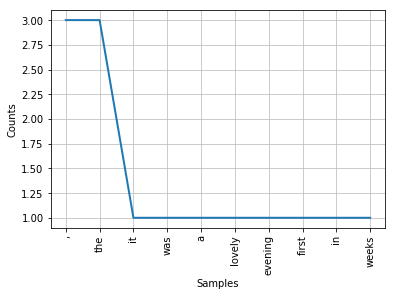

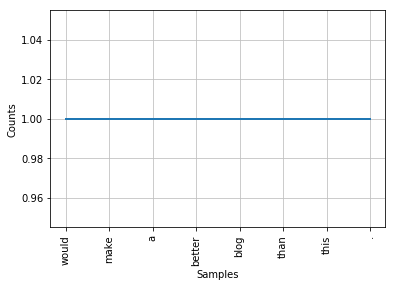

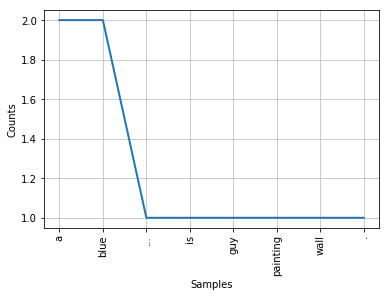

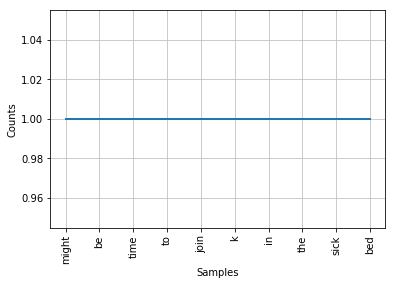

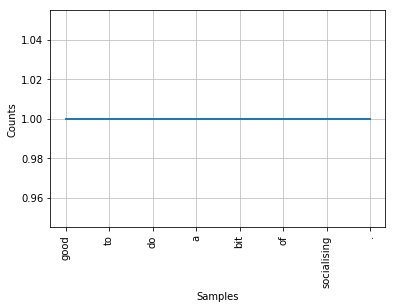

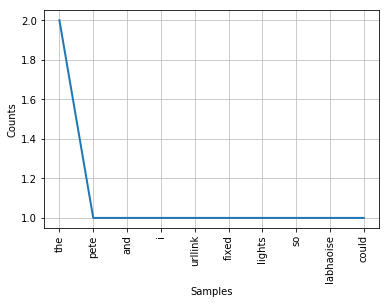

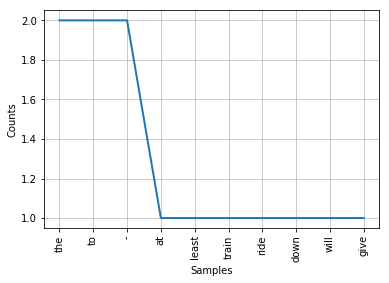

In [19]:
for word_list in word_lists:
    freq = FreqDist(word_list)
    freq.plot(10)

In [20]:
freq = FreqDist(word_list)
freq

FreqDist({'the': 2, 'to': 2, '-': 2, 'at': 1, 'least': 1, 'train': 1, 'ride': 1, 'down': 1, 'will': 1, 'give': 1, ...})

In [21]:
freq_dict = dict(freq)
freq_words = list(freq_dict.keys())
frequencies = list(freq_dict.values())
freq_df = pd.DataFrame(list(zip(freq_words, frequencies)), columns=['Word','Freq'])
freq_df.to_csv(path+str(j)+'_frequency.csv', index=False)
print('Saved file to disk.')

Saved file to disk.


## Stopwords and Non stopwords

In [22]:
stop = []
non_stopwords = []
for word_list in word_lists: 
    for word in word_list:
        if not word in set(stopwords.words('english')):
            non_stopwords.append(word)
        else:
            stop.append(word)

In [23]:
stop_df = pd.DataFrame(stop, columns=['Stopwords'])
# Saving stopwords to file
stop_df.to_csv(path+str(j)+'_stopwords.csv', index=False)
print('Saved file to disk.')

Saved file to disk.


In [24]:
stop_df.head()

,Stopwords
0,it
1,was
2,a
3,the
4,in


In [25]:
non_stop_df = pd.DataFrame(non_stopwords, columns=['Non Stopwords'])
# Saving non stopwords to file
non_stop_df.to_csv(path+str(j)+'_non_stopwords.csv', index=False)
print('Saved file to disk.')

Saved file to disk.


In [26]:
non_stop_df.head()

,Non Stopwords
0,lovely
1,evening
2,","
3,first
4,weeks


## Lexicon Normalization

In [27]:
# Stemming
ps = PorterStemmer()
stem = [ps.stem(word) for word in non_stopwords]
stem_df = pd.DataFrame(stem, columns=['Stemmed Words'])
# Saving word stemmed words to file
stem_df.to_csv(path+str(j)+'_stems.csv', index=False)
print('Saved file to disk.')

Saved file to disk.


In [28]:
stem_df.head()

,Stemmed Words
0,love
1,even
2,","
3,first
4,week


In [29]:
# Lemmatization
lemmatizer = WordNetLemmatizer() 
lemma = [lemmatizer.lemmatize(word) for word in non_stopwords]
lemma_df = pd.DataFrame(lemma, columns=['Lemma'])
# Saving word stemmed words to file
lemma_df.to_csv(path+str(j)+'_lemmas.csv', index=False)
print('Saved file to disk.')

Saved file to disk.


In [30]:
lemma_df.head()

,Lemma
0,lovely
1,evening
2,","
3,first
4,week
